# Topic:Regression

In [54]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
boston = load_boston()
boston.DESCR
boston.feature_names 
x = boston.data
y = boston.target

# Fitting a model is trivial: call the ``fit`` method in LinearRegression:
lr = LinearRegression()
reg=lr.fit(x, y)


In [56]:
boston.DESCR
boston.feature_names 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
print(boston.data.shape)

(506, 13)


In [57]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [61]:
boston.data
type(boston.data)

numpy.ndarray

In [69]:
bos = pd.DataFrame(boston.data)
print(bos)
type(bos)

           0     1      2    3      4      5     6       7    8      9    10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         11    12  
0    396.90  4.98  

pandas.core.frame.DataFrame

In [70]:
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [74]:
bos['PRICE'] = boston.target
print(bos.head())
X2=bos[['CRIM','TAX']]
X2

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


,CRIM,TAX
0,0.00632,296.0
1,0.02731,242.0
2,0.02729,242.0
3,0.03237,222.0
4,0.06905,222.0
...,...,...
501,0.06263,273.0
502,0.04527,273.0
503,0.06076,273.0
504,0.10959,273.0


In [9]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

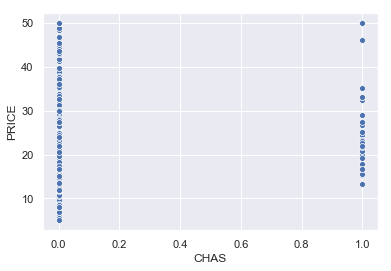

In [79]:
X = bos.drop('PRICE', axis = 1)
X2=bos[['CRIM','PRICE']]
Y = bos['PRICE']
import seaborn as sns
sns.set(style="darkgrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="CHAS", y="PRICE",
                     palette=cmap, sizes=(10, 200),
                     data=bos)

In [11]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


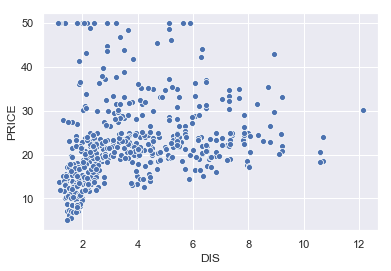

In [53]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="DIS", y="PRICE",
                     palette=cmap, sizes=(10, 200),
                     data=bos)

In [78]:
correlationdata = bos.corr()
print(correlationdata)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

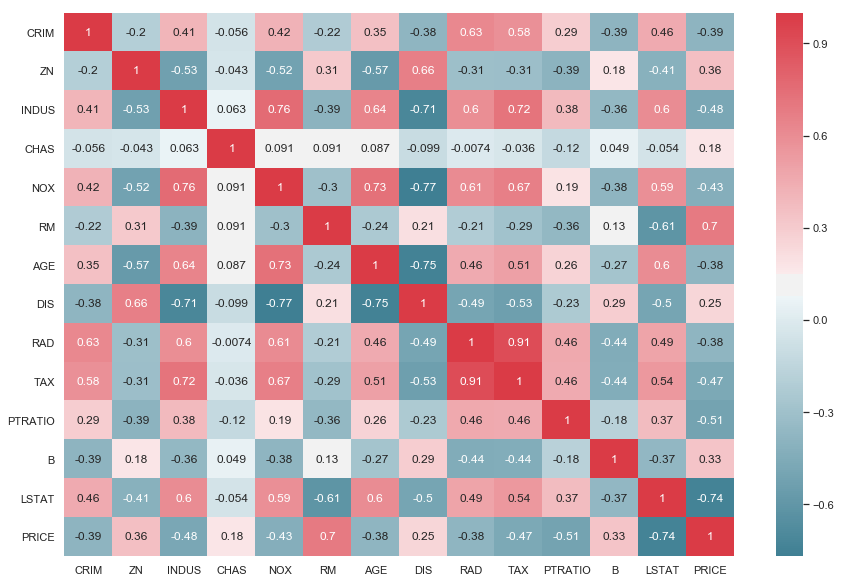

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(bos.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(bos)
plt.savefig("heat_map.png")

In [13]:
lr = LinearRegression()
reg=lr.fit(X2, Y)

In [14]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
#To retrieve the intercept:
print(reg.intercept_)

29.800667010997643


In [17]:
#For retrieving the slope:
print(reg.coef_)

[-0.31181577 -0.08955328]


In [19]:
y_pred = reg.predict(X2)
y_pred

array([23.95982272, 22.72639782, 24.32045238, 25.68903348, 24.92534856,
       24.53458199, 23.8088886 , 21.14952419, 20.77947142, 22.05501943,
       21.28566881, 22.34007141, 26.27884715, 24.06990544, 22.03448918,
       24.54527681, 26.84812403, 22.23963842, 26.27271947, 23.35039843,
       20.62516275, 21.54683526, 21.204328  , 20.53713133, 21.13976082,
       21.86385761, 21.50449403, 21.55031192, 21.10580726, 21.67008628,
       21.02109933, 20.42291633, 22.02450119, 20.93398131, 20.62005184,
       23.67312435, 24.27171252, 26.05921713, 27.04157472, 27.83979012,
       28.37525135, 29.50122471, 29.16549346, 29.16887975, 26.18027928,
       26.72031481, 26.75980929, 22.07237189, 21.18707911, 24.17983613,
       25.68041487, 24.14528716, 27.89437956, 27.86869536, 25.53369037,
       27.83536236, 26.59720723, 26.16929412, 27.1375514 , 25.54154804,
       23.82567979, 21.38284912, 23.69457095, 25.87461013, 24.46616355,
       28.19544322, 27.00190571, 27.86617588, 26.46284294, 26.80

In [20]:
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,24.0,23.959823
1,21.6,22.726398
2,34.7,24.320452
3,33.4,25.689033
4,36.2,24.925349
...,...,...
501,22.4,23.593007
502,20.6,22.917815
503,23.9,21.632373
504,22.0,21.769388


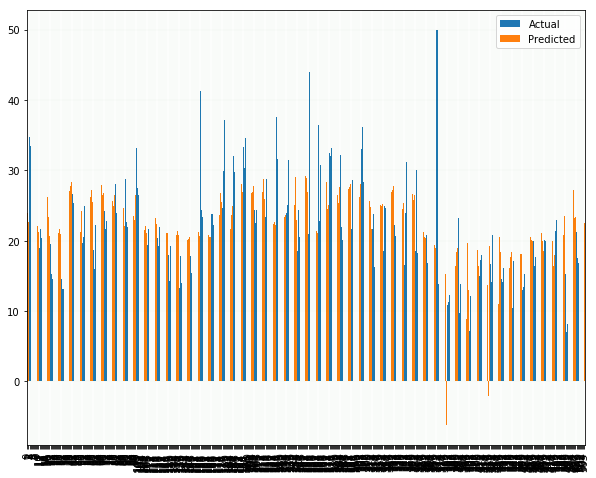

In [21]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.02', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.02', color='black')
plt.show()

In [25]:
from sklearn import metrics

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 5.7738189933008215
Mean Squared Error: 66.13782635525362
Root Mean Squared Error: 8.132516606515699


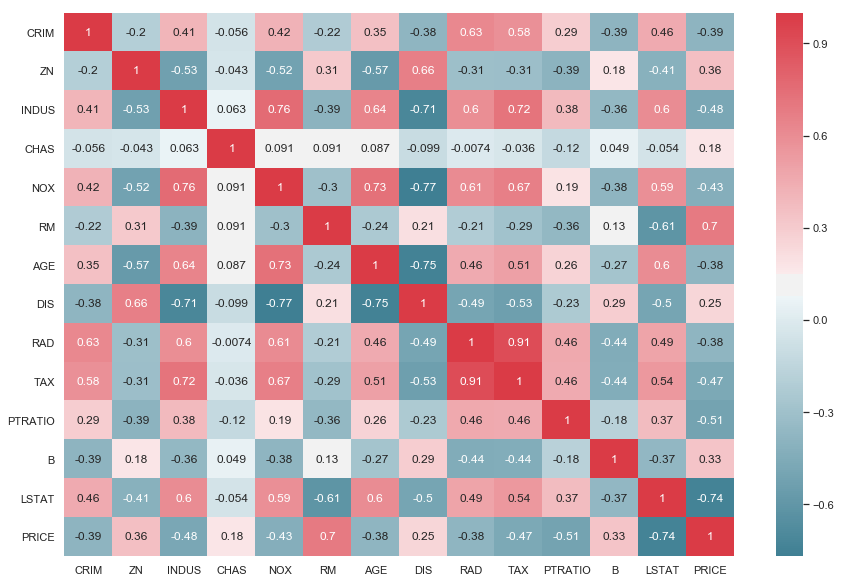

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(bos.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(bos)
plt.savefig("heat_map.png")

In [27]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

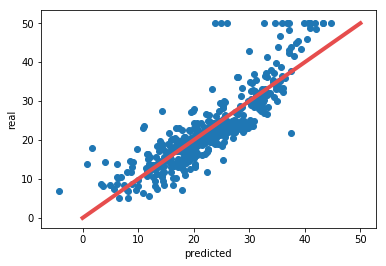

In [59]:
fig, ax = plt.subplots()
# Plot a diagonal (for reference):
ax.plot([0, 50], [0, 50], '-', color=(.9,.3,.3), lw=4)

# Plot the prediction versus real:
ax.scatter(y_pred, boston.target)

ax.set_xlabel('predicted')
ax.set_ylabel('real')
fig.savefig('Figure_1.png')

In [61]:
from sklearn.model_selection import KFold

In [62]:
kf = KFold(n_splits=10)

In [63]:
kf.get_n_splits(x)

10

In [64]:
err = 0
for train,test in kf.split(x):
    reg=lr.fit(x[train],y[train])
    y_pred =reg.predict(x[test])
    e = y[test]-y_pred
    err += np.sum(e*e)   
rmse_10cv = np.sqrt(err/len(x))
print('RMSE on 10-fold CV: {}'.format(rmse_10cv))

RMSE on 10-fold CV: 5.877045136800733


Text(0, 0.5, 'House Price')

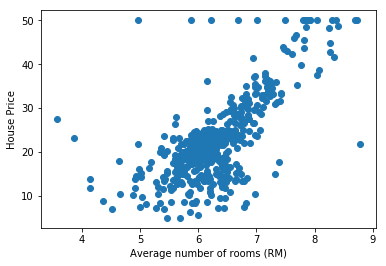

In [65]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

boston = load_boston()

# Index number five in the number of rooms
fig,ax = plt.subplots()
ax.scatter(boston.data[:, 5], boston.target)
ax.set_xlabel("Average number of rooms (RM)")
ax.set_ylabel("House Price")


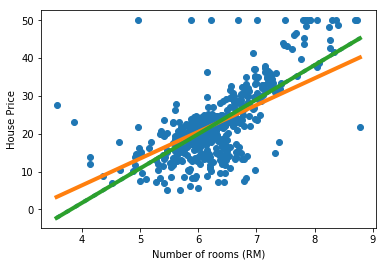

In [121]:
from sklearn.linear_model import LinearRegression, Lasso
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

boston = load_boston()
fig, ax = plt.subplots()
ax.scatter(boston.data[:, 5], boston.target)
ax.set_xlabel("Number of rooms (RM)")
ax.set_ylabel("House Price")


x = boston.data[:, 5]
xmin = x.min()
xmax = x.max()
x = np.transpose(np.atleast_2d(x))
y = boston.target

lr = LinearRegression()
lr.fit(x, y)
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]), ':', lw=4, label='OLS model')

las = Lasso()
las.fit(x, y)
lasso001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso001.fit(x,y)


ax.plot([xmin, xmax], las.predict([ [xmin], [xmax] ]), '-', lw=4, label='Lasso model')
fig.savefig('Figure3.png')

ax.plot([xmin, xmax], lasso001.predict([ [xmin], [xmax] ]), '-', lw=4, label='Lasso model')
fig.savefig('Figure4.png')


In [67]:
from __future__ import print_function
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target

for name, met in [
        ('linear regression', LinearRegression()),
        ('lasso()', Lasso()),
        ('elastic-net(.5)', ElasticNet(alpha=0.5)),
        ('lasso(.5)', Lasso(alpha=0.5)),
        ('ridge(.5)', Ridge(alpha=0.5)),
]:
    # Fit on the whole data:
    met.fit(x, y)

    # Predict on the whole data:
    p = met.predict(x)
    r2_train = r2_score(y, p)

    # Now, we use 10 fold cross-validation to estimate generalization error
    kf = KFold(n_splits=10)
    kf.get_n_splits(x)
    p = np.zeros_like(y)
    for train, test in kf.split(x):
        met.fit(x[train], y[train])
        p[test] = met.predict(x[test])

    r2_cv = r2_score(y, p)
    print('Method: {}'.format(name))
    print('R2 on training: {}'.format(r2_train))
    print('R2 on 10-fold CV: {}'.format(r2_cv))
    print()
    print()

Method: linear regression
R2 on training: 0.7406426641094095
R2 on 10-fold CV: 0.5908571294061398


Method: lasso()
R2 on training: 0.6825842212709925
R2 on 10-fold CV: 0.5921809071038234


Method: elastic-net(.5)
R2 on training: 0.7056176997612844
R2 on 10-fold CV: 0.6446374960151873


Method: lasso(.5)
R2 on training: 0.7140164719858566
R2 on 10-fold CV: 0.6105225100043221


Method: ridge(.5)
R2 on training: 0.739957023371629
R2 on 10-fold CV: 0.5962772910196159




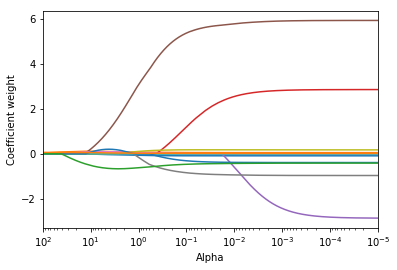

In [122]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
import numpy as np

boston = load_boston()
x = boston.data
y = boston.target

las = Lasso(normalize=1)
alphas = np.logspace(-5, 2, 1000)
alphas, coefs, _= las.path(x, y, alphas=alphas)

fig,ax = plt.subplots()
ax.plot(alphas, coefs.T)
ax.set_xscale('log')
ax.set_xlim(alphas.max(), alphas.min())
ax.set_xlabel('Lasso coefficient path as a function of alpha')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coefficient weight')
fig.savefig('Figure_LassoPath.png')

In [68]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(x)
err = 0
las = Lasso()

for train,test in kf.split(x):
    lasso=las.fit(x[train],y[train])
    y_pred =lasso.predict(x[test])
    e = y[test]-y_pred
    err += np.sum(e*e)   
rmse_10cv = np.sqrt(err/len(x))
print('RMSE on 10-fold CV: {}'.format(rmse_10cv))

RMSE on 10-fold CV: 5.867529873320226


In [29]:
dataset = pd.DataFrame({'CRIM':x[:, 0], 'ZN':x[:, 1], 'INDUS':x[:, 3], 'CHAS':x[:, 4], 'NOX':x[:, 5], 'RM':x[:, 6], 'AGE':x[:, 7], 'DIS':x[:, 8], 'RAD':x[:, 8],
        'TAX':x[:, 9], 'PTRATIO':x[:, 10], 'B':x[:, 10], 'LSTAT':x[:, 11], 'HOUSEPRICE':y   })

In [30]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSEPRICE
0,0.00632,18.0,0.0,0.538,6.575,65.2,4.0900,1.0,1.0,296.0,15.3,15.3,396.90,24.0
1,0.02731,0.0,0.0,0.469,6.421,78.9,4.9671,2.0,2.0,242.0,17.8,17.8,396.90,21.6
2,0.02729,0.0,0.0,0.469,7.185,61.1,4.9671,2.0,2.0,242.0,17.8,17.8,392.83,34.7
3,0.03237,0.0,0.0,0.458,6.998,45.8,6.0622,3.0,3.0,222.0,18.7,18.7,394.63,33.4
4,0.06905,0.0,0.0,0.458,7.147,54.2,6.0622,3.0,3.0,222.0,18.7,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,0.573,6.593,69.1,2.4786,1.0,1.0,273.0,21.0,21.0,391.99,22.4
502,0.04527,0.0,0.0,0.573,6.120,76.7,2.2875,1.0,1.0,273.0,21.0,21.0,396.90,20.6
503,0.06076,0.0,0.0,0.573,6.976,91.0,2.1675,1.0,1.0,273.0,21.0,21.0,396.90,23.9
504,0.10959,0.0,0.0,0.573,6.794,89.3,2.3889,1.0,1.0,273.0,21.0,21.0,393.45,22.0


In [31]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM          506 non-null float64
ZN            506 non-null float64
INDUS         506 non-null float64
CHAS          506 non-null float64
NOX           506 non-null float64
RM            506 non-null float64
AGE           506 non-null float64
DIS           506 non-null float64
RAD           506 non-null float64
TAX           506 non-null float64
PTRATIO       506 non-null float64
B             506 non-null float64
LSTAT         506 non-null float64
HOUSEPRICE    506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [32]:
dataset.shape

(506, 14)

In [33]:
dataset['INDUS'].value_counts()

0.0    471
1.0     35
Name: INDUS, dtype: int64

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

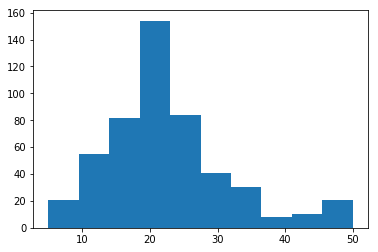

In [34]:
plt.hist('HOUSEPRICE',data=dataset,bins=10)

NameError: name 'sns' is not defined

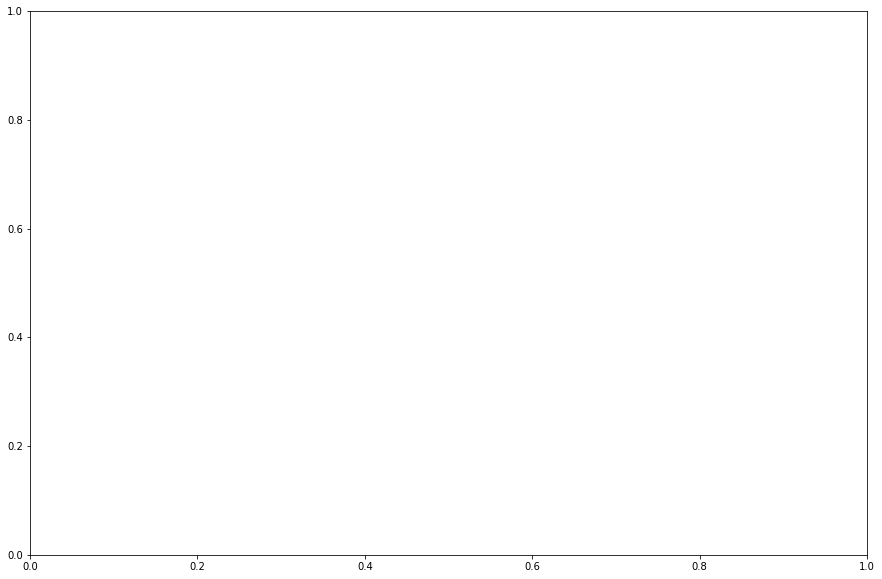

In [35]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(dataset.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(dataset)

In [73]:
newX=dataset.drop('HOUSEPRICE',axis=1)

In [74]:
newX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,65.2,4.0900,1.0,1.0,296.0,15.3,15.3,396.90
1,0.02731,0.0,0.0,0.469,6.421,78.9,4.9671,2.0,2.0,242.0,17.8,17.8,396.90
2,0.02729,0.0,0.0,0.469,7.185,61.1,4.9671,2.0,2.0,242.0,17.8,17.8,392.83
3,0.03237,0.0,0.0,0.458,6.998,45.8,6.0622,3.0,3.0,222.0,18.7,18.7,394.63
4,0.06905,0.0,0.0,0.458,7.147,54.2,6.0622,3.0,3.0,222.0,18.7,18.7,396.90
5,0.02985,0.0,0.0,0.458,6.430,58.7,6.0622,3.0,3.0,222.0,18.7,18.7,394.12
6,0.08829,12.5,0.0,0.524,6.012,66.6,5.5605,5.0,5.0,311.0,15.2,15.2,395.60
7,0.14455,12.5,0.0,0.524,6.172,96.1,5.9505,5.0,5.0,311.0,15.2,15.2,396.90
8,0.21124,12.5,0.0,0.524,5.631,100.0,6.0821,5.0,5.0,311.0,15.2,15.2,386.63
9,0.17004,12.5,0.0,0.524,6.004,85.9,6.5921,5.0,5.0,311.0,15.2,15.2,386.71


In [76]:
newY=dataset['HOUSEPRICE']

In [77]:
newY

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: HOUSEPRICE, Length: 506, dtype: float64

In [79]:
newX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,65.2,4.0900,1.0,1.0,296.0,15.3,15.3,396.90
1,0.02731,0.0,0.0,0.469,6.421,78.9,4.9671,2.0,2.0,242.0,17.8,17.8,396.90
2,0.02729,0.0,0.0,0.469,7.185,61.1,4.9671,2.0,2.0,242.0,17.8,17.8,392.83
3,0.03237,0.0,0.0,0.458,6.998,45.8,6.0622,3.0,3.0,222.0,18.7,18.7,394.63
4,0.06905,0.0,0.0,0.458,7.147,54.2,6.0622,3.0,3.0,222.0,18.7,18.7,396.90
5,0.02985,0.0,0.0,0.458,6.430,58.7,6.0622,3.0,3.0,222.0,18.7,18.7,394.12
6,0.08829,12.5,0.0,0.524,6.012,66.6,5.5605,5.0,5.0,311.0,15.2,15.2,395.60
7,0.14455,12.5,0.0,0.524,6.172,96.1,5.9505,5.0,5.0,311.0,15.2,15.2,396.90
8,0.21124,12.5,0.0,0.524,5.631,100.0,6.0821,5.0,5.0,311.0,15.2,15.2,386.63
9,0.17004,12.5,0.0,0.524,6.004,85.9,6.5921,5.0,5.0,311.0,15.2,15.2,386.71


In [80]:
lr = LinearRegression()
lr.fit(newX, newY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)